# Import

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Para generar datos
from sklearn import datasets 
# Importamos librerias de Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering
# Importamos silhouette_score
from sklearn.metrics import silhouette_score , rand_score
# from helpers import report_clustering_kmeans, report_clustering_hierarchical
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.express as py 
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn import preprocessing
# 3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.express as py 

## Dataset

In [2]:
iris = pd.read_csv( 'iris.data' , names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'] )
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# EDA

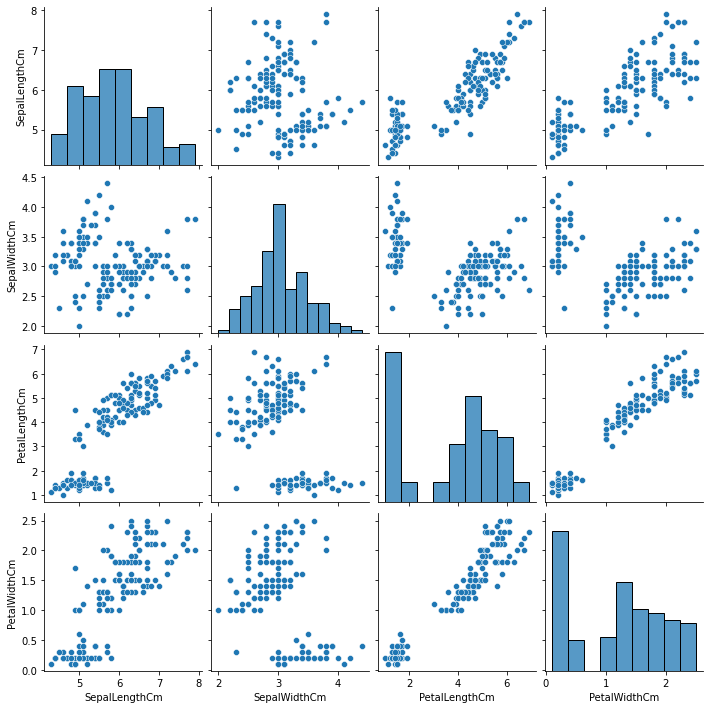

In [4]:
sns.pairplot(iris)

# Hierarchical

## Define DataSet

### Define y

In [5]:
y = iris[['Species']]
enc = preprocessing.LabelEncoder()
y = enc.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Define X

In [25]:
x = iris[['SepalWidthCm','PetalWidthCm']]

## Linkage

In [7]:
Z = linkage(iris[['SepalWidthCm','PetalWidthCm']], 'ward')

In [8]:
# Threshold
dist_cluster = 4

## Dedogram

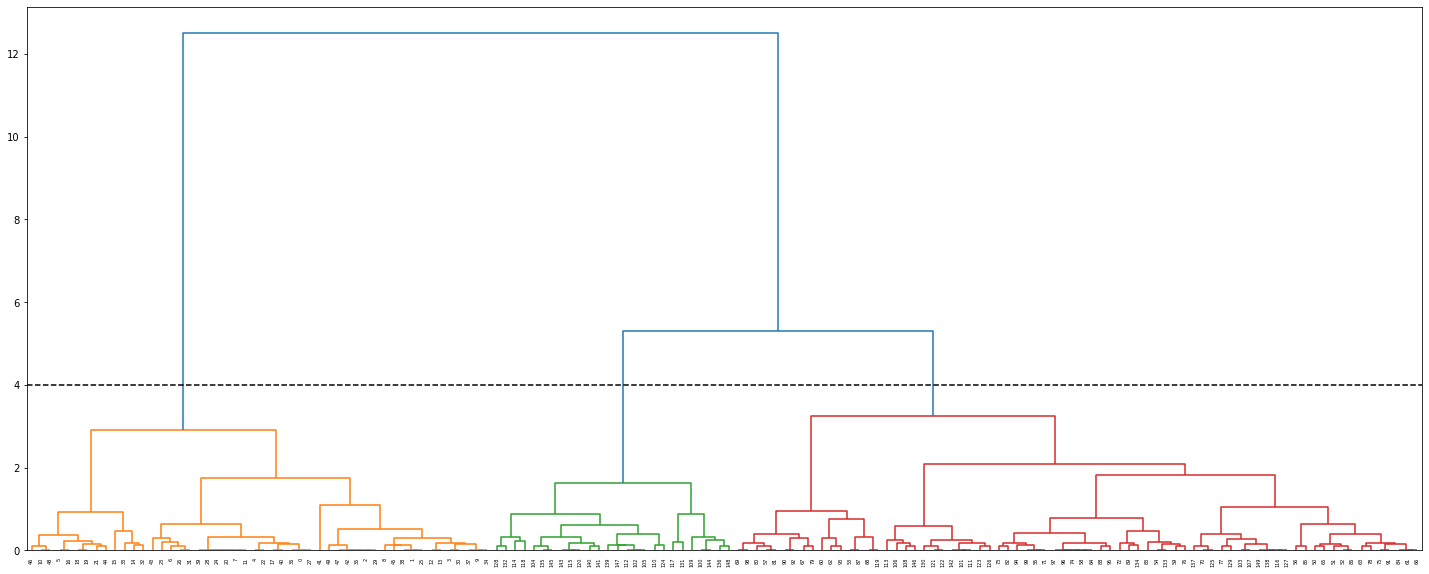

In [9]:
plt.figure(figsize=(25, 10))
dendrogram(Z,color_threshold=dist_cluster)
plt.axhline(c='k',linestyle='--', y=dist_cluster)
plt.show()

### Define y

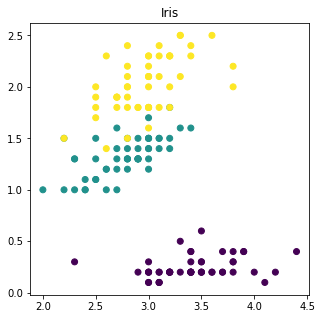

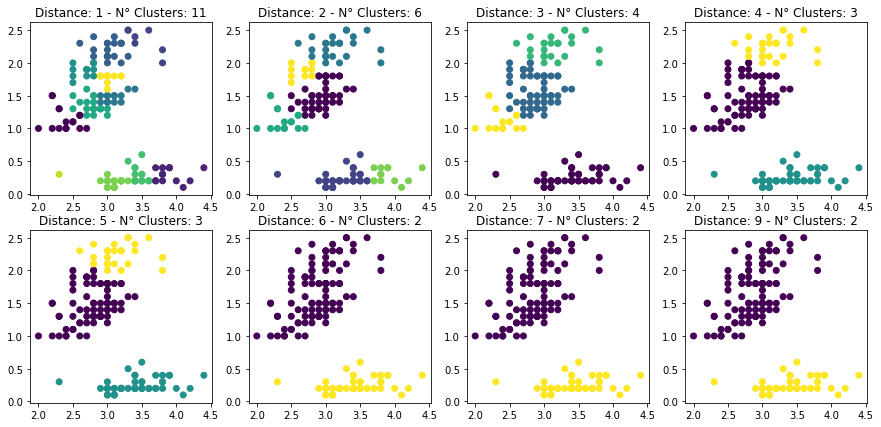

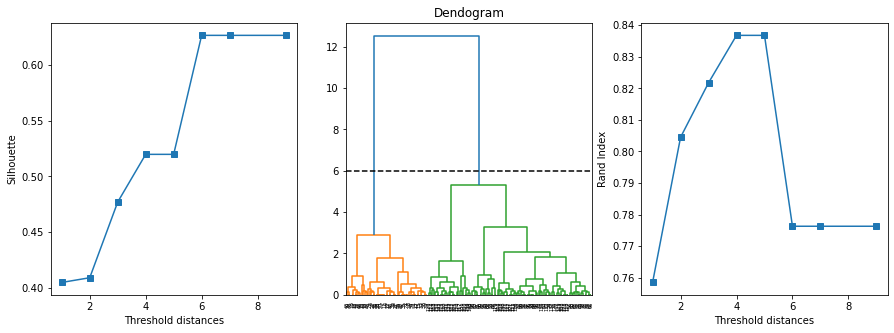

In [27]:
# dataset : Nustras features
dataset = iris[['SepalWidthCm','PetalWidthCm']]
# dist_clusters : Distancia
dist_clusters = np.linspace(1,9,8,dtype=int)
# affinity_measure : Metrica  (Medir distancia entre puntos)
affinity_measure = 'euclidean'
# linkage_name : Metodo (Medir distancia entre clusters)
linkage_name = 'ward'

# Listas vacias donde guardar las metricas/scores
sil_list = []
rand_list = []

# Plot para tener de referencia
plt.figure(figsize=(5,5))
plt.scatter(x=x['SepalWidthCm'],y=x['PetalWidthCm'],c=y)
plt.title('Iris')
plt.show()
# Plot donde iremos mostrando los resultados
fig,axs = plt.subplots(2,4,figsize=(15,7))
axs = axs.ravel()

for i , dist_i in enumerate(dist_clusters):
    cluster = AgglomerativeClustering(n_clusters=None,
                                      distance_threshold = dist_i,
                                      affinity= affinity_measure,
                                      linkage=linkage_name)

    cluster.fit_predict(x)
    # Labels
    labels_i = cluster.labels_
    n_clusters = len(np.unique(labels_i))

    if not 1 < n_clusters:
        sil_list.append(0)
        rand_list.append(0) 
        continue

    # Silhouette
    sil_score = silhouette_score(x,labels_i)
    sil_list.append(sil_score)
    # Rand_Index
    rand_index_i = rand_score(y,labels_i)
    rand_list.append(rand_index_i)  
    # Plots de los clusters
    axs[i].scatter(x=x['SepalWidthCm'],y=x['PetalWidthCm'],c=labels_i)
    axs[i].set_title('Distance: ' + str(dist_i) + ' - N° Clusters: ' + str(n_clusters))

plt.show()

# Plot de metricas
fig, axs = plt.subplots(1,3,figsize=(15,5))    
axs[0].plot(dist_clusters, sil_list, marker='s');
axs[0].set_xlabel('Threshold distances')
axs[0].set_ylabel('Silhouette')

# Plot dendomgram best silhouette_score
best_sil = np.argmax(sil_list)
best_dist = dist_clusters[best_sil]
Z = linkage(x, linkage_name)
dendrogram(Z,color_threshold=best_dist,ax=axs[1])
axs[1].axhline(c='k',linestyle='--', y=best_dist)
axs[1].set_title('Dendogram')
axs[2].plot(dist_clusters, rand_list, marker='s');
axs[2].set_xlabel('Threshold distances')
axs[2].set_ylabel('Rand Index')     
plt.show()


In [26]:
x2 = x

In [28]:
x2['LabelbyHierarchical'] = labels_i
x2

,SepalWidthCm,PetalWidthCm,LabelbyHierarchical
0,3.5,0.2,1
1,3.0,0.2,1
2,3.2,0.2,1
3,3.1,0.2,1
4,3.6,0.2,1
...,...,...,...
145,3.0,2.3,0
146,2.5,1.9,0
147,3.0,2.0,0
148,3.4,2.3,0


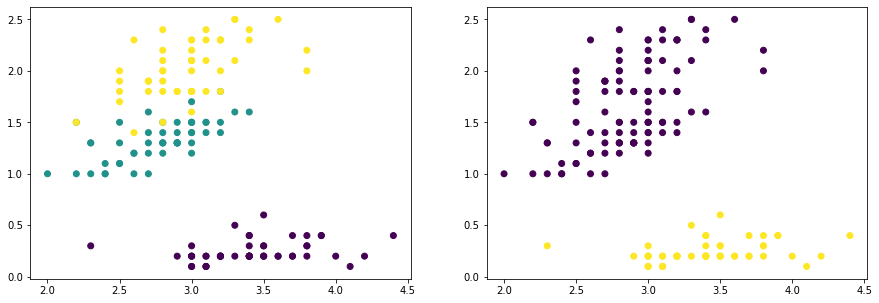

In [29]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].scatter( x=iris['SepalWidthCm'] , y=iris['PetalWidthCm'] , c=y )
axs[1].scatter( x=x2['SepalWidthCm'] , y=x2['PetalWidthCm'] , c=x2['LabelbyHierarchical'] )
plt.show()

## Training with distance_threshold = 4

In [32]:
x3 = iris[['SepalWidthCm','PetalWidthCm']]

In [34]:
cluster2 = AgglomerativeClustering( n_clusters=None,
                                    distance_threshold = 4,
                                    affinity= 'euclidean',
                                    linkage='ward')

In [35]:
cluster2.fit_predict(x3)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2,
       2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [39]:
x3['labelsecondtraining'] = cluster2.labels_

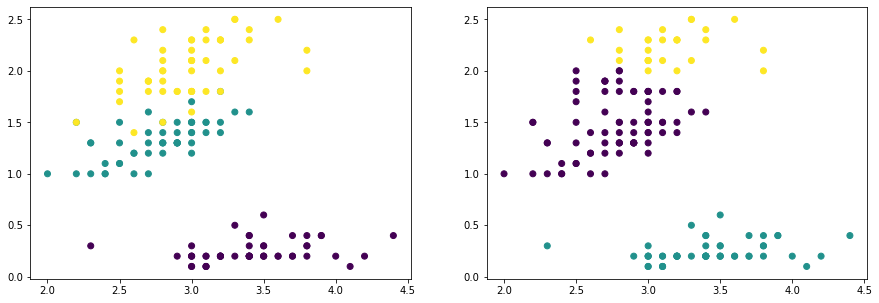

In [40]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].scatter( x=iris['SepalWidthCm'] , y=iris['PetalWidthCm'] , c=y )
axs[1].scatter( x=x3['SepalWidthCm'] , y=x3['PetalWidthCm'] , c=x3['labelsecondtraining'] )
plt.show()